| Modelo        |   Acurácia |   Precisão |   Revocação |   F1-score |    AUC |
|:--------------|-----------:|-----------:|------------:|-----------:|-------:|
| Decision Tree |     0.8644 |     0.8172 |      0.8432 |     0.8285 | 0.8432 |


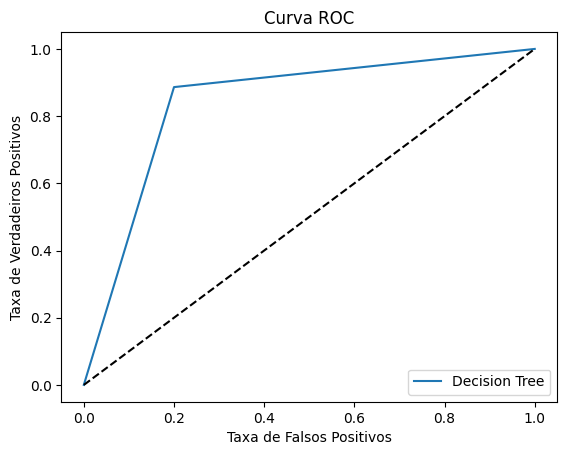

In [6]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from tabulate import tabulate

# Leitura do arquivo Parkinsons
df = pd.read_csv('parkinsons.data')

# Separação dos dados em features e target
y = df['status']
X = df.drop(['name', 'status'], axis=1)


# Normalização dos dados
X = (X - X.min()) / (X.max() - X.min())

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinamento do modelo Decision Tree
dtc_model = DecisionTreeClassifier(random_state=42)
dtc_model.fit(X_train, y_train)

# Predição no conjunto de teste
dtc_pred = dtc_model.predict(X_test)

# Métricas do modelo
dtc_report = classification_report(y_test, dtc_pred)
dtc_confusion = confusion_matrix(y_test, dtc_pred)
dtc_auc_score = roc_auc_score(y_test, dtc_pred)
dtc_fpr, dtc_tpr, dtc_thresholds = roc_curve(y_test, dtc_pred)

# Métricas do modelo Decision Tree
dtc_report = classification_report(y_test, dtc_pred, output_dict=True)
dtc_accuracy = dtc_report['accuracy']
dtc_precision = dtc_report['macro avg']['precision']
dtc_recall = dtc_report['macro avg']['recall']
dtc_f1_score = dtc_report['macro avg']['f1-score']
dtc_auc_score = roc_auc_score(y_test, dtc_pred)

# Adicionando os resultados na tabela
header = ['Modelo', 'Acurácia', 'Precisão', 'Revocação', 'F1-score', 'AUC']
rows = [['Decision Tree', dtc_accuracy, dtc_precision, dtc_recall, dtc_f1_score, dtc_auc_score]]

# Tabela em formato LaTeX
table = tabulate(rows, headers=header, tablefmt='pipe', floatfmt=".4f")
print(table)


# Plot da curva ROC
plt.plot(dtc_fpr, dtc_tpr, label='Decision Tree')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()
